In [4]:
import numpy as np
import matplotlib.pyplot as plt

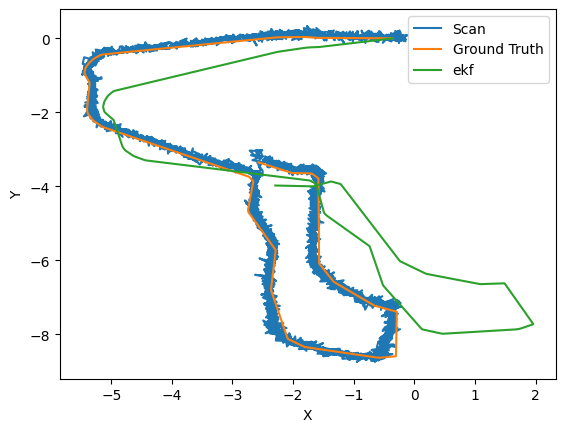

In [5]:
data = np.load("./data/sim/data.npz")
scan_pose = np.load("./results/scan_pose.npy")
ekf = np.load("./results/ekf.npy")
# ukf = np.load("./results/ukf.npy")
# pf = np.load("./results/pf.npy")
# nano = np.load("./results/nano.npy")
ground_truth = data["ground_truth"]
time_gt = data["ground_truth_t"]
odom = data["odom"]
odom_t = data["odom_t"]
odom_ = []
for t in time_gt:
    idx = np.argmin(np.abs(odom_t - t))
    odom_.append(odom[idx])
odom = np.array(odom_)
plt.plot(scan_pose[:, 0], scan_pose[:, 1], label="Scan")
plt.plot(ground_truth[:, 0], ground_truth[:, 1], label="Ground Truth")
# plt.plot(nano[:, 0], nano[:, 1], label="nano")
plt.plot(ekf[:, 0], ekf[:, 1], label="ekf")
# plt.plot(odom[:, 0], odom[:, 1], label="Odom")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [6]:
ekf = np.linalg.norm(ground_truth[:-1][:, :2] - ekf[:, :2], axis=1)
nano = np.linalg.norm(ground_truth[:-1][:, :2] - nano[:, :2], axis=1)
ukf = np.linalg.norm(ground_truth[:-1][:, :2] - ukf[:, :2], axis=1)
# pf = np.linalg.norm(ground_truth[:-1][:, :2] - pf[:, :2], axis=1)
plt.figure()
plt.plot(nano, label="NANO")
plt.plot(ekf, label="EKF")
plt.plot(ukf, label="UKF")
# plt.plot(pf, label="PF")
plt.xlabel("Step")
plt.ylabel("Error(m)")
plt.legend()
plt.show()
print("NANO: ", np.mean(nano), np.std(nano))
print("EKF: ", np.mean(ekf), np.std(ekf))
print("UKF: ", np.mean(ukf), np.std(ukf))

NameError: name 'nano' is not defined